# Regresión Lineal

El modelo de regresión lineal es un enfoque lineal para modelar la relación entre las variables independientes y la dependiente, estos se modelan utilizando funciones predictoras lineales, en los cuales sus parámetros desconocidos se modelan con los datos.

Como su nombre lo indica es lineal por lo que cumple con la función de una recta
\begin{align}
Y=\beta_0+\beta_1 X_1+\epsilon,  \hspace{1cm} \epsilon\overset{}{\sim} Normal (0, \sigma^2)
\end{align}

donde $Y$ es la variable independiente, $X_1$ es la variable dependiente, el $\epsilon$ es el error asociado, $\beta_{\{0,1\}}$ los parámetros del modelo que se estiman bajo el método de mínimos cuadrados. A este modelo se le llama regresión lineal simple dado que solo tiene una variable independiente.

Si nuestro caso a modelar tiene varias variables independientes $X_{\{0,1,2,...,k\}}$ es de regresión lineal múltiple el cual viene dada por

\begin{align}
Y&=\beta_0+\beta_1 X_1+\beta_2 X_2+...+\beta_k X_k+\epsilon_{\{1,2,...,k\}},  \hspace{1cm} \epsilon\overset{}{\sim} Normal (0, \sigma^2)\\
Y&=\beta_0 +\sum_{i=1}^{k}\beta_i X_i +\epsilon_i,
\end{align}

En los dos modelos de regresión nosotros buscamos los coeficientes $\beta_{\{0,1,...,k\}}$ con machine learning. Al buscar los resultados tienen que cumplir con Independencia residual, Normalidad y Homoscedasticidad.

La independencia residual se refiere a que los residuos no tengan un patrón definido, como ejemplo los residuos no aumentaran con el tiempo, se pueden hacer pruebas como la de Durbin-Watson para determinar esta independencia.

La normalidad se da cuando los residuos distribuyen normalmente en un gráfico Q-Q, esto se refiere a que deben caer dentro de una línea diagonal dentro del gráfico, también se puede ver con los test de shapiro-wilk o D'Agostino's.

La homoscedasticidad se refiere a que los residuos tienen que tener una desviación estándar de la media para cada valor de $X$, si esto no se cumple puede que los resultados del analisis sean imprecisos.

# Ejemplo
Suponga que le han pedido averiguar si existe una relación entre el
número de veces que batean los jugadores de un equipo de béisbol y el
número de runs que consigue. En caso de existir y de establecer un modelo,
podría predecir el resultado del partido para los siguientes datos:

equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y." ,"Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
"Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
"Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
"Atlanta","Washington","San.F","San.I","Seattle"]

bateos = [5659, 5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559, 5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735, 667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570, 593, 556]

Para esto obtenga lo siguiente:
1. Obtenga la distribución de cada una de las variables
2. Separe sus datos en 70/30
3. Obtenga su modelo de Regresión lineal
4. Entregue la recta matemática de regresión con las estimaciones obtenidas
5. Realice un diagnóstico de los residuos del modelo.
6. Realice el test de normalidad
7. Obtenga las predicciones del modelo
8. Entregue el error del test
9. Interprete sus resultados y responda al problema planteado.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from matplotlib import style
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.anova import anova_lm
from scipy import stats
from statsmodels.compat import lzip

# Creamos dataframe y analizamos correlación

In [ ]:
#creamos el dataframe
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.","Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago","Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona","Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa","Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659, 5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559, 5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]
runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735, 667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570, 593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs':runs})

#revisamos el data para ver si tiene objetos nulos y que tipos de datos son
datos.info()

#normalizamos datos
def mean_norm(df_input):
    return df_input.select_dtypes(include=['float64', 'int']).apply(lambda x: (x-x.mean())/ x.std(), axis=0)

def minmax_norm(df_input):
    return (datos.select_dtypes(include=['float64', 'int']) - datos.select_dtypes(include=['float64', 'int']).min()) / ( datos.select_dtypes(include=['float64', 'int']).max() - datos.select_dtypes(include=['float64', 'int']).min())

#datos normalizados por la media
datos_norm_mean = mean_norm(datos)

#datos normalizados por min y max
datos_norm_minmax=minmax_norm(datos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   equipos  30 non-null     object
 1   bateos   30 non-null     int64 
 2   runs     30 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


luego de comprobar si esta completa nuestra data, vemos que tan relacionados estan los datos

<ipython-input-3-74c05f738d17>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = datos.corr(method='pearson')


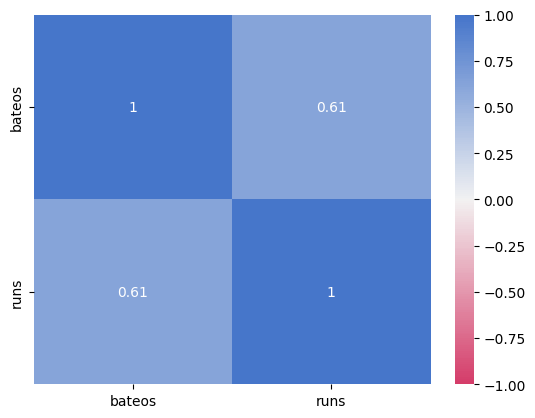

In [ ]:
#correlaciones de los datos
corr_matrix = datos.corr(method='pearson')

#graficamos la matriz de correlacion
plt.figure()
sns.heatmap(corr_matrix,annot=True,linewidths=0,vmin=-1,vmax=1,cmap= sns.diverging_palette(0, 255, n=200));
#sns.diverging_palette() es solo para la paleta de colores, sin embargo si hay un n muy alto 999999 el codigo se dispara en tiempo de ejecucion(4 segundos)

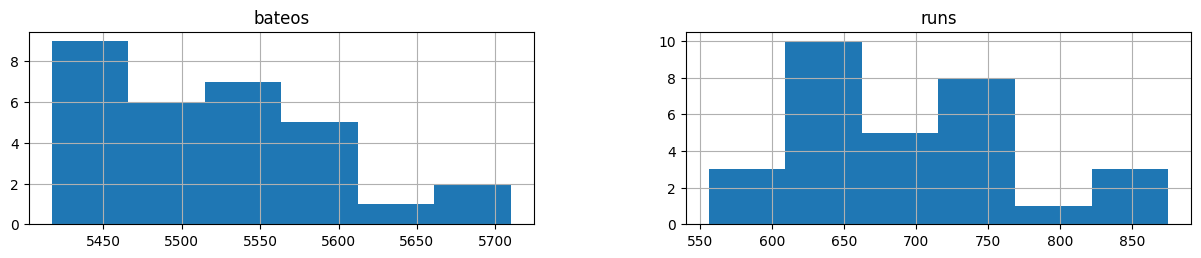

In [ ]:
#graficos de distribucion de variables
datos.hist(bins=6, figsize=(15,2.5))
plt.show()

por lo que las variables pueden estar correlacionas, teniendo solo una variable independiente y como tiene una asimetria hacia la izquerda podemos intuir tienen una distribucion poissoniana o una distribucion normal, las cuales se relacionan de la forma

\begin{align}
Z=\frac{X-\lambda}{\sqrt{\lambda}}
\end{align}
donde $Z$ es la variable que distribuye normalmente $N(0;1)$, $X$ una variable aleatoria y $\lambda$ numero de veces que ocurre el suceso, por lo que tiene que ser $\lambda>0$, y se define $X\thicksim Poisson(\lambda)$

https://es.wikipedia.org/wiki/Distribución_de_Poisson


# Ajuste del modelo

Para ajustar el modelo lo primero que que que hacer es determinar las variables dependiente y independientes

en este caso en concreto la variables son bateos y runs, donde bateos es una variable independiente y la dependiente es runs

como ya la tenemos identificados el tipo de variable podemos separar en datos de entrenamiento y testeo

# Datos normalizados

In [ ]:
#creamos nuestra set de datos de entrenamiento 70/30
X = datos_norm_minmax[['bateos']]
y = datos_norm_minmax['runs']

X_train, X_test, y_train, y_test=train_test_split(X,y.values.reshape(-1,1),train_size=.7,random_state = 9,shuffle= True)
#values.reshape les da forma de vector columna
#donde ramdom_state es una semilla aleatoria para que elija una cadena de datos

#obtenemos el modelo de regresion lineal
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     26.44
Date:                Tue, 22 Aug 2023   Prob (F-statistic):           5.80e-05
Time:                        05:50:42   Log-Likelihood:                 5.6394
No. Observations:                  21   AIC:                            -7.279
Df Residuals:                      19   BIC:                            -5.190
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1161      0.073      1.591      0.1

por lo que la ecuacion de la recta con los datos obtenidos de la regresion lineal es
\begin{align}
y=0.1161+0.8420x_i
\end{align}

donde $x_i$ corresponde al valor de bateo

# Datos sin normalizar

In [ ]:
#creamos nuestra set de datos de entrenamiento 70/30
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test=train_test_split(X,y.values.reshape(-1,1),train_size=.7,random_state = 9,shuffle= True)
#values.reshape les da forma de vector columna
#donde ramdom_state es una semilla aleatoria para que elija una cadena de datos

#obtenemos el modelo de regresion lineal
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     26.44
Date:                Tue, 22 Aug 2023   Prob (F-statistic):           5.80e-05
Time:                        05:50:52   Log-Likelihood:                -115.43
No. Observations:                  21   AIC:                             234.9
Df Residuals:                      19   BIC:                             236.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4372.5563    984.760     -4.440      0.0

ec de la recta:
\begin{align}
y=-4372.5563+0.9167x_i
\end{align}

# Datos estandarizados



In [ ]:
#creamos nuestra set de datos de entrenamiento 70/30
X = datos_norm_mean[['bateos']]
y = datos_norm_mean['runs']

X_train, X_test, y_train, y_test=train_test_split(X,y.values.reshape(-1,1),train_size=.7,random_state = 9,shuffle= True)
#values.reshape les da forma de vector columna
#donde ramdom_state es una semilla aleatoria para que elija una cadena de datos

#obtenemos el modelo de regresion lineal
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     26.44
Date:                Tue, 22 Aug 2023   Prob (F-statistic):           5.80e-05
Time:                        05:51:59   Log-Likelihood:                -22.766
No. Observations:                  21   AIC:                             49.53
Df Residuals:                      19   BIC:                             51.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0355      0.164     -0.217      0.8

ec. de la recta
\begin{align}
y=-0.0355+0.8877x_i
\end{align}

# Analizis del residuo

In [ ]:
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

<ipython-input-9-ae39df38e4b3>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


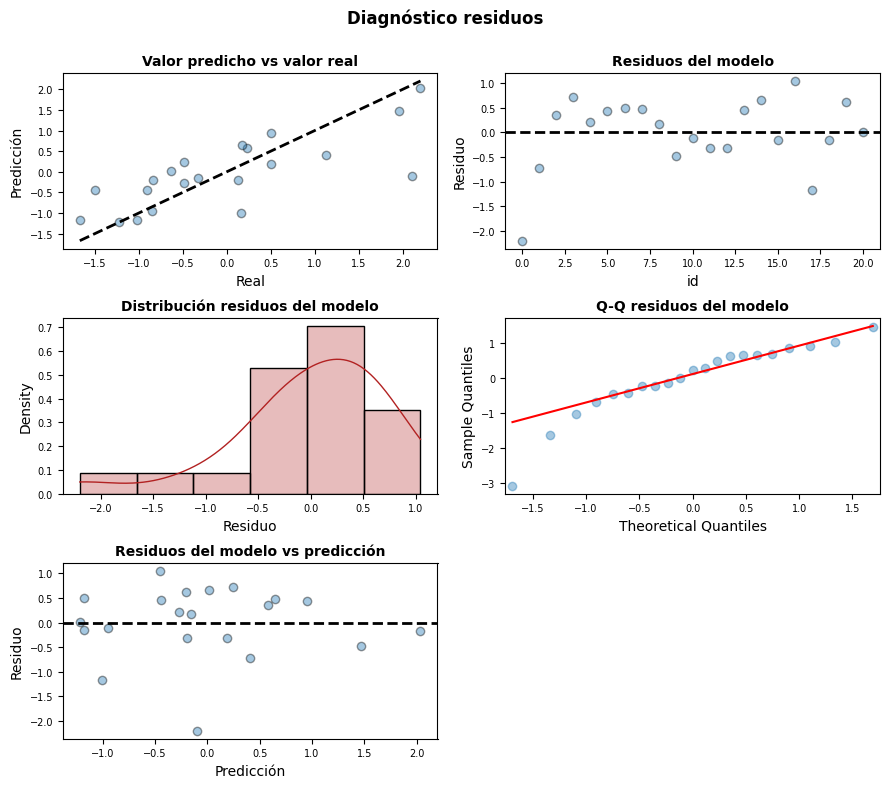

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1],
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

Si bien el modelo distribuye generalmente normal, se puede apreciar en el gráfico de distribución de residuos y el de quantil-quantil que esta están asimétricos hacia la izquierda.

Los gráficos de residuos del modelo son casi simétricos, hay un dato atípico que se escapa

## Normalidad

In [ ]:
#test de normalidad
#shapiro-wilk
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.8954060077667236, pvalue=0.02853270433843136)

In [ ]:
#D'Agostino's
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 11.883046677118472, p-value = 0.00262802323109849


de estos test de normalidad, nos podemos dar cuenta que es una distribucion asimetrica, dado que el test de shapiro-wilk nos da un valor bajo $0.5$ y el de D'Agostino's nos da cercano a cero

## Homocedasticidad

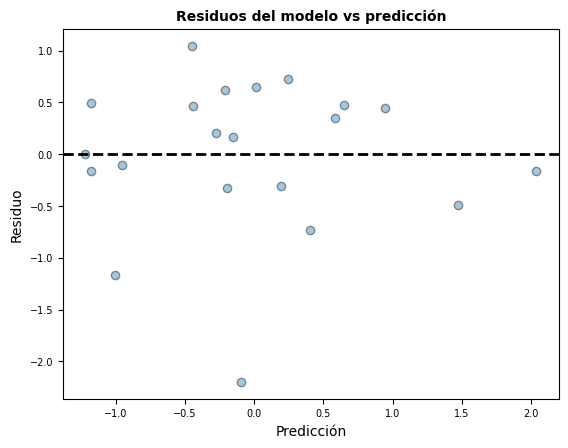

In [ ]:
fig, axes = plt.subplots()
axes.scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes.axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes.set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes.set_xlabel('Predicción')
axes.set_ylabel('Residuo')
axes.tick_params(labelsize = 7)

In [ ]:
# realizar la prueba de Bresuch-Pagan
nombres = ['estadística del multiplicador de Lagrange', 'valor p',
        'estadístico f', ' f valor-p ']
test = sms.het_breuschpagan (residuos_train, X_train)
lzip(nombres, test)

[('estadística del multiplicador de Lagrange', 0.10632114960542294),
 ('valor p', 0.744371968812044),
 ('estadístico f', 0.0966848326217528),
 (' f valor-p ', 0.7592303867575967)]

In [ ]:
## Error del test

X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)

mae = mean_absolute_error(y_true = y_test,y_pred = predicciones)

mse = mean_squared_error(y_true = y_test,y_pred = predicciones,squared = True)

rmse = mean_squared_error(y_true = y_test,y_pred = predicciones,
        squared = False
       )

print(f"El error (mae) de test es: {mae} \n El error (mse) de test es: {mse} \n El error (rmse) de test es: {rmse}")

El error (mae) de test es: 0.8824290631020342 
 El error (mse) de test es: 1.077973877010867 
 El error (rmse) de test es: 1.0382552080345502
